In [ ]:
CRISTIAM FAJARDO - DATASET REGRESION LOGISTICA - – Heart Disease Cleveland UCI - UNAD 

In [45]:
#Preparacion inicial : Cargar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
#Paso 1 : analisis exploratorio
Dataset = pd.read_csv('./Dataset2.csv')

In [54]:
Dataset.head(50)

,Edad,Sexo,Paralisis_Cerebral,Presion_Arterial_Reposo,Colesterol,Glucosa,Electrocardioagrama_Reposo,Frecuencia_Cardiaca,Flujo_Sanguineo,Variacion_Flujo_Sanguineo,Variacion_Cardiaca,Cirujia_Cardiaca,Produccion_Hemoglobina,Condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [32]:
#Valores estadisticos del dataset 
Dataset.describe()

,Edad,Sexo,Paralisis_Cerebral,Presion_Arterial_Reposo,Colesterol,Glucosa,Electrocardioagrama_Reposo,Frecuencia_Cardiaca,Flujo_Sanguineo,Variacion_Flujo_Sanguineo,Variacion_Cardiaca,Cirujia_Cardiaca,Produccion_Hemoglobina,Condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [33]:
#Paso 2: preprocesado de datos

In [34]:
#Busqueda de datos faltantes
print("Cantidad de registros con valor 0 en edad: ", Dataset['Edad'].isin([0]).sum())
print("Cantidad de registros con valor 2 en sexo: ", Dataset['Sexo'].isin([2]).sum())
print("Cantidad de registros con valor 0 en glucosa: ", Dataset['Glucosa'].isin([0]).sum())
print("Cantidad de registros con valor 0 en presion arterial en reposo: ", Dataset['Presion_Arterial_Reposo'].isin([0]).sum())
print("Cantidad de registros con valor 0 en flujo sanguineo: ", Dataset['Flujo_Sanguineo'].isin([0]).sum())
print("Cantidad de registros con valor 0 en produccion hemoglobina: ", Dataset['Produccion_Hemoglobina'].isin([2]).sum())
print("Cantidad de registros con valor 2 en condicion: ", Dataset['Condicion'].isin([2]).sum())

Cantidad de registros con valor 0 en edad:  0
Cantidad de registros con valor 2 en sexo:  0
Cantidad de registros con valor 0 en glucosa:  254
Cantidad de registros con valor 0 en presion arterial en reposo:  0
Cantidad de registros con valor 0 en flujo sanguineo:  200
Cantidad de registros con valor 0 en produccion hemoglobina:  115
Cantidad de registros con valor 2 en condicion:  0


In [35]:
#Reemplazar los valores de 0 y 2 por el valor de la media
Dataset['Glucosa']=Dataset['Glucosa'].replace(0,Dataset['Glucosa'].mean())
Dataset['Flujo_Sanguineo']=Dataset['Flujo_Sanguineo'].replace(0,Dataset['Flujo_Sanguineo'].mean())
Dataset['Produccion_Hemoglobina']=Dataset['Produccion_Hemoglobina'].replace(2,Dataset['Produccion_Hemoglobina'].mean())

In [36]:
#BComprobacion aplicacion de cambios
print("Cantidad de registros con valor 0 en edad: ", Dataset['Edad'].isin([0]).sum())
print("Cantidad de registros con valor 2 en sexo: ", Dataset['Sexo'].isin([2]).sum())
print("Cantidad de registros con valor 0 en glucosa: ", Dataset['Glucosa'].isin([0]).sum())
print("Cantidad de registros con valor 0 en presion arterial en reposo: ", Dataset['Presion_Arterial_Reposo'].isin([0]).sum())
print("Cantidad de registros con valor 0 en flujo sanguineo: ", Dataset['Flujo_Sanguineo'].isin([0]).sum())
print("Cantidad de registros con valor 0 en produccion hemoglobina: ", Dataset['Produccion_Hemoglobina'].isin([2]).sum())
print("Cantidad de registros con valor 2 en condicion: ", Dataset['Condicion'].isin([2]).sum())

Cantidad de registros con valor 0 en edad:  0
Cantidad de registros con valor 2 en sexo:  0
Cantidad de registros con valor 0 en glucosa:  0
Cantidad de registros con valor 0 en presion arterial en reposo:  0
Cantidad de registros con valor 0 en flujo sanguineo:  0
Cantidad de registros con valor 0 en produccion hemoglobina:  0
Cantidad de registros con valor 2 en condicion:  0


Text(0.5, 1.0, 'Grafica datos faltantes y atipicos')

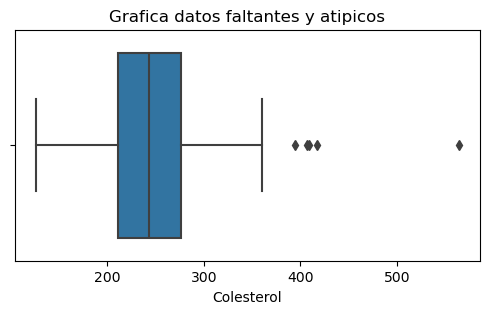

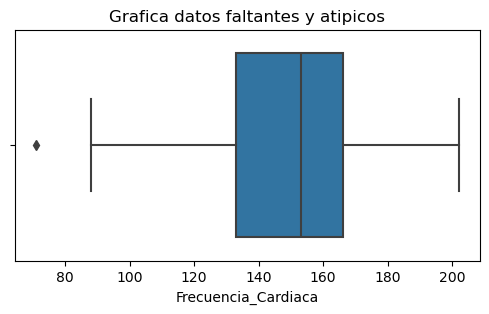

In [37]:
#Grafica de datos faltantes y atipicos en colesterol
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Colesterol'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

#Grafica de datos faltantes y atipicos en Frecuencia_Cardiaca
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Frecuencia_Cardiaca'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

In [38]:
#Rango datos atipicos
Nivel_minimo=200
Nivel_maximo=500
Total_atipicos=((Dataset['Colesterol']<Nivel_minimo)|(Dataset['Colesterol']>Nivel_maximo)).sum()
print("El total de datos atipicos en Colesterol es: {}".format(Total_atipicos))

#Rango datos atipicos
Nivel_minimo=100
Nivel_maximo=180
Total_atipicos=((Dataset['Frecuencia_Cardiaca']<Nivel_minimo)|(Dataset['Frecuencia_Cardiaca']>Nivel_maximo)).sum()
print("El total de datos atipicos en Colesterol es: {}".format(Total_atipicos))

El total de datos atipicos en Colesterol es: 49
El total de datos atipicos en Colesterol es: 26


In [39]:
#Retirar datos atipicos colesterol
Dataset=Dataset[(Dataset['Colesterol']<Nivel_minimo)&(Dataset['Colesterol']>Nivel_maximo)]

#Retirar datos atipicos frecuencia cardiaca
Dataset=Dataset[(Dataset['Frecuencia_Cardiaca']<Nivel_minimo)&(Dataset['Frecuencia_Cardiaca']>Nivel_maximo)]

In [40]:
#Confirmacion eliminacion datos atipicos en colesterol
Atipicos_Colesterol=((Dataset['Colesterol']<Nivel_minimo)|(Dataset['Colesterol']>Nivel_maximo)).sum()
print("El total de datos atipicos en colesterol es: {}".format(Atipicos_Colesterol))

#Confirmacion eliminacion datos atipicos en Frecuencia_Cardiaca
Atipicos_Frecuencia_Cardiaca=((Dataset['Frecuencia_Cardiaca']<Nivel_minimo)|(Dataset['Frecuencia_Cardiaca']>Nivel_maximo)).sum()
print("El total de datos atipicos en Frecuencia_Cardiaca es: {}".format(Atipicos_Frecuencia_Cardiaca))

El total de datos atipicos en colesterol es: 0
El total de datos atipicos en Frecuencia_Cardiaca es: 0


In [65]:
#Paso 3 : Seleccion caracteristica que solicita la guia

In [66]:
#Total personas con enfermedad cardiaca
Dataset['Condicion'].value_counts()

Condicion
0    160
1    137
Name: count, dtype: int64

In [67]:
#Paso 4 : Dividir el dataset en Train y test

In [69]:
#Creacion de variables X y Y para almacenar la informacion
X = Dataset.drop('Condicion',axis=1) #Datos sin columna condicion
Y = Dataset['Condicion'] #Datos de la columna condicion

#Asignacion de 80% Train y 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [70]:
#Datos sin columna Condicion
print (X_train)

     Edad  Sexo  Paralisis_Cerebral  Presion_Arterial_Reposo  Colesterol  \
261    51     1                   3                      140         261   
121    51     0                   2                      140         308   
12     59     1                   0                      134         204   
141    44     1                   2                      120         226   
29     62     1                   1                      128         208   
..    ...   ...                 ...                      ...         ...   
174    64     1                   3                      120         246   
294    35     1                   3                      120         198   
135    46     0                   2                      142         177   
252    53     1                   3                      123         282   
246    54     1                   3                      110         239   

     Glucosa  Electrocardioagrama_Reposo  Frecuencia_Cardiaca  \
261        0          

In [71]:
#Datos columna condicion
print (Y_train)

261    0
121    0
12     1
141    0
29     0
      ..
174    1
294    1
135    0
252    1
246    1
Name: Condicion, Length: 237, dtype: int64


In [ ]:
#Paso 5 : Entrenar modelo

In [76]:
#Creacion modelo de regresion logistica
Modelo_regresion = LogisticRegression(solver = "liblinear")
Modelo_regresion.fit (X_train, Y_train)

#Declaracion variable de pronostico
Pronostico = Modelo_regresion.predict(X_test)

In [77]:
print (Y_test)

129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
163    1
94     0
77     0
47     0
55     0
149    0
33     1
202    1
218    0
39     0
230    1
116    0
271    0
42     0
244    1
96     1
30     0
108    0
131    0
201    1
110    0
270    1
216    1
285    0
198    1
76     1
89     0
63     0
168    1
14     0
235    1
105    0
217    1
185    1
46     0
160    1
148    0
137    0
43     0
276    0
Name: Condicion, dtype: int64


In [78]:
#Impresion del pronostico
print (Pronostico)

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [ ]:
#Paso 6 : Evaluar desempeño del modelo 

In [79]:
print (classification_report(Y_test, Pronostico))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
#Paso 7 : Graficas con los resultados

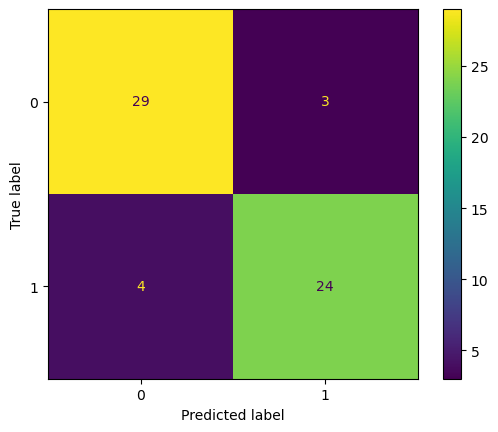

In [81]:
#Matrix de confusion

cm=confusion_matrix(Y_test,Pronostico)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

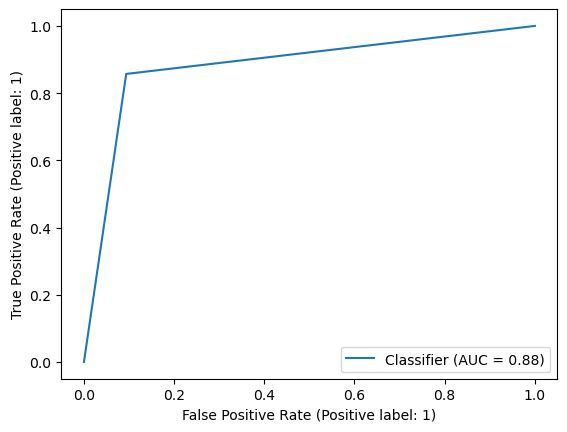

In [83]:
#Curva de prediccion

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Pronostico)
plt.show()

In [ ]:
#Paso 8 y 9 : Resultados y carga de codigo GITHUB
#Se documentan los resultados obtenidos en el documento que se entregara en el entorno de evaluacion junto con el enlace del repositoriode GITHUB